# CSC/XMM validation catalogs, XMM/CSC hostless catalog

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


matplotlib settings set
matplotlib settings set


***

In [3]:
# desi_lh.gz_pkl number of sources and area
false_dens_arcmin = 2418574 / (41.729 * 3600)
print(false_dens_arcmin)
false_dens_arcsec = false_dens_arcmin / 3600

print(f'{ false_dens_arcsec:.3f}')

FALSE_PROB = .03



def fsource_r(rho: float, f_thresh: float) -> float:
    """
    The function calculates the radius which corresponds to the probability `f_thresh`
    to FIND one or more false sources. 

    Args:
        rho (float): the density of the false sources (in arcmin^{-2}).
        f_thresh (float): probability to FIND one or more false sources.

    Returns:
        float: radius (in arcsec).
    """

    rho = rho / 3600 # arcmin^{-2} -> arcsec^{-2}
    pf_r = np.sqrt(-1 / (rho * np.pi) * np.log(1 - f_thresh))
    
    return pf_r




r_false = fsource_r(false_dens_arcmin, FALSE_PROB)

print(f'Радиус для {FALSE_PROB:.0%} вероятности найти ложный: {r_false:.2f}"')

desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')
desi.sample(5)

16.099741453452303
0.004
Радиус для 3% вероятности найти ложный: 1.47"


,release,objid,brickid,ra,dec,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,type,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,ref_cat,ref_id,mjd_max,mjd_min,iso_max,iso_min,desi_id
1044150,9011,1792,614513,159.964735,58.937347,0.299841,0.216829,0.392226,1.830702,1.668800,-5.623837,-44.79759,429.67996,164.301100,52.925808,4.477203,1.121860,0.001349,0.000017,23.778605,24.140062,23.505169,21.841785,21.942963,NaN,NaN,6.215322,2.779308,2.853448,3.873656,1.767558,-0.206541,-0.186389,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.398524,57851.288345,2018-03-17 09:33:52.450,2017-04-08 06:55:13.000,9011_614513_1792
313669,9011,1082,620306,160.169596,61.042326,0.044734,0.017070,0.711956,0.310995,-0.214322,-138.041370,258.73746,652.37790,228.849430,138.593720,4.905050,1.173921,0.001057,0.000013,25.858180,26.909160,22.863127,23.767246,NaN,NaN,16.467808,1.142575,0.258229,8.381567,0.688770,-0.232213,-4.487038,0.919628,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58245.176656,57414.410104,2018-05-07 04:14:23.061,2016-01-27 09:50:33.000,9011_620306_1082
464323,9011,1765,615255,159.326371,59.249964,0.338542,0.771377,2.241429,5.840887,8.420257,153.224030,1022.86743,393.14145,134.892720,73.541700,3.994248,1.033403,0.001318,0.000017,23.650078,22.764393,21.613932,20.582321,20.185776,17.036490,14.975378,6.712532,8.959027,19.221704,11.673371,8.559731,5.562628,4.195036,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.398524,57851.288345,2018-03-17 09:33:52.450,2017-04-08 06:55:13.000,9011_615255_1765
2350956,9011,1997,602729,158.846646,55.245086,0.104246,0.404215,0.976537,4.169789,3.233485,28.638044,159.29916,442.28540,145.353580,62.981690,4.552633,1.107983,0.001473,0.000018,24.928663,23.465830,22.515911,20.948215,21.224903,18.857445,16.994392,2.192358,4.873322,7.749897,8.897037,3.403590,1.099178,0.678787,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,57894.195251,57850.335035,2017-05-21 04:41:09.680,2017-04-07 08:02:27.000,9011_602729_1997
1452572,9011,571,607584,158.772908,56.677638,0.158316,0.338001,1.672347,7.141078,4.356344,39.287945,90.57909,466.76117,102.748184,40.063786,4.404128,1.083088,0.001400,0.000017,24.485003,23.666803,21.935585,20.364664,20.901625,18.514230,17.607384,3.420360,3.426137,10.585279,14.986275,4.533713,1.470076,0.376652,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.397094,57784.428207,2018-03-17 09:31:48.949,2017-01-31 10:16:37.100,9011_607584_571


In [4]:
ero_df_orig = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') 
ero_df = ero_df_orig.copy()
#shift in RA_fin and DEC_fin by 60 arcsec in a random direction
rand_ang = np.random.uniform(0, 2*np.pi, len(ero_df))
ero_df['RA_fin'] = ero_df['RA_fin'] + 60/3600*np.cos(rand_ang)
ero_df['DEC_fin'] = ero_df['DEC_fin'] + 60/3600*np.sin(rand_ang)


ero_df.sample(5)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
2486,SRGe J104321.6+545855,160.854651,54.973765,153.898736,53.750454,3.979023,135.858444,1.306350e-14,1.422655e-15,122.984520,13.393392,8600.790039,0.0,0.0,0.0,1286,1025,160.842148,54.980673,1.561483,137.855988,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.014299,0.001557,31.137051,160.840139,54.981963,850334289735804416,5.254388,1,0,19.671967,-1.0,0,GALEX 2684965652299517773,0.437,Seyfert_1,5.247109,1,0,0,1,15.143000,14.304000,11.212,32.5,27.8,8.6,1,2,1,1237657770712957078,7548266728868040704,5.259475,74640847323,1.561483,1.422528,2.147436,3.481987,137.392898,42.568886,1.005287e-14,8.223379e+19
1306,SRGe J105843.3+585633,164.669298,58.929965,146.629594,52.687477,4.464888,87.214920,2.123818e-14,2.684842e-15,107.676819,13.612060,4631.829102,0.0,0.0,0.0,258,216,164.682229,58.941264,1.805539,34.321541,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.023247,0.002939,18.839767,164.680220,58.942554,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,16.679001,16.636999,12.527,13.6,4.4,0.3,1,1,0,1237655108910318019,0,5.014359,59105379299,1.805539,1.596228,2.409653,3.907162,136.887837,47.032730,1.634360e-14,7.031054e+19
3392,SRGe J103424.1+600653,158.585040,60.121584,148.591859,49.628402,12.190435,6.303624,9.950121e-15,4.030248e-15,11.760611,4.763578,1079.814087,0.0,0.0,0.0,9271,8115,158.602287,60.113544,5.388186,105.579544,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,0.010891,0.004411,6.332551,158.600278,60.114834,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,54827472713,5.388186,4.358163,6.579049,10.667680,132.196652,46.316306,7.657007e-15,7.562368e+19
2521,SRGe J104725.7+554722,161.851764,55.805159,152.222168,53.705999,4.817088,63.279720,1.292951e-14,2.058530e-15,59.871975,9.532322,4230.474609,0.0,0.0,0.0,2642,2104,161.859263,55.788134,1.978577,118.585381,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.014153,0.002253,19.957731,161.857254,55.789423,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,1,16.020000,15.004000,12.189,22.0,16.8,3.7,1,2,0,1237657222023218287,0,7.112368,71339938377,1.978577,1.722142,2.599731,4.215366,137.500164,43.558646,9.949761e-15,6.073248e+19
5253,SRGe J110247.6+592516,165.684197,59.412059,145.461908,52.693153,15.046522,6.753504,6.496404e-15,2.449126e-15,13.208375,4.979520,1857.478638,0.0,0.0,0.0,6687,5591,165.700238,59.419763,6.679365,158.886368,0.000014,6.268413e+08,6.270701e+08,0.0,0.0,0.007111,0.002681,9.367308,165.698229,59.421052,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,17.033001,16.541000,12.667,10.9,4.9,0.2,1,1,0,1237658304354190101,0,9.353171,57341884342,6.679365,5.379234,8.120449,13.167002,137.120454,47.722756,4.999236e-15,6.658631e+19


In [5]:
# ero_new_cross_ero_old = cross_match_data_frames(ero_df, ero_df_orig, 'RA_fin', 'DEC_fin', 'RA_fin', 'DEC_fin',30, 'ero_old')
# ero_df = ero_df[~ero_df['srcname_fin'].isin(ero_new_cross_ero_old['srcname_fin'])]
# ero_df

# CSC

In [6]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_df.sample(5)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
128765,2CXO J110416.0+594348,166.066755,59.730266,1.581628,1.081588,52.946004,3.757576,130.811602,TRUE,False,False,False,False,False,False,False,5.015677e-15,2.813673e-15,7.095348e-15,4.878481e-15,2.736709e-15,6.901266e-15,0.782795,2.189596,9.894158e-15,4.225246e-15,True
123779,2CXO J104706.9+591439,161.778852,59.244221,1.304252,1.119756,145.835053,2.971429,29.410988,TRUE,False,False,False,False,False,False,True,NaN,NaN,NaN,1.971015e-16,3.942030e-17,3.468986e-16,0.702274,1.964367,NaN,NaN,True
118709,2CXO J104353.9+584043,160.974710,58.678678,2.386215,1.422672,23.922148,2.666667,24.489177,TRUE,False,False,False,False,False,False,False,1.990442e-15,1.085696e-15,2.849952e-15,6.501553e-16,3.250777e-16,9.752330e-16,1.134975,3.174696,2.640598e-15,1.329915e-15,True
114643,2CXO J103327.4+573932,158.364432,57.659059,1.126037,1.033402,76.586818,4.540541,101.737843,TRUE,False,False,False,False,False,False,True,7.053414e-16,4.167927e-16,9.938902e-16,9.771367e-16,6.955888e-16,1.242123e-15,0.624394,1.746523,1.682478e-15,5.621456e-16,True
115049,2CXO J103513.6+575019,158.807012,57.838674,4.080680,4.080680,0.000000,4.971429,26.915138,TRUE,False,False,True,False,False,False,False,2.334685e-15,1.357375e-15,3.311995e-15,3.086341e-15,2.417014e-15,3.755668e-15,2.357659,6.594725,5.421026e-15,1.675192e-15,False


## CSC x ERO cross-match

In [7]:
ero_csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 216 out of 9215 x 2329
	 total unique pairs: 198
	 total non-unique pairs (duplicates in df2): 18
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 130


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
157,SRGe J103217.9+573836,158.083645,57.657378,151.907303,50.930161,7.994929,11.204412,5.009360e-15,1.487260e-15,23.293640,6.915791,4248.176758,0.0,0.0,0.0,7896,6756,158.076603,57.642093,3.474160,71.306168,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.005483,0.001628,23.342964,158.074594,57.643383,-1,-1.000000,0,-1,NaN,-1.0,-1,CLASXS 78,0.359,AGN,3.413986,1,1,1,0,16.044001,15.654,12.346,21.5,10.2,2.7,1,1,0,1237655108908679547,7980557322027290624,2.941205,64018963902,3.474160,2.858241,4.314779,6.996251,133.709382,44.069989,3.854898e-15,6.132790e+19,2CXO J103222.2+573934,158.092637,57.659698,0.859479,0.785361,165.986026,6.893620,512.560340,TRUE,False,False,False,False,False,False,False,3.818040e-15,2.386275e-15,5.249805e-15,5.328707e-16,2.164787e-16,8.492626e-16,0.475645,1.330449,4.350911e-15,2.073671e-15,True,19.226266,1,1
23,SRGe J104718.7+590001,161.830875,59.016677,148.233719,51.594071,4.295221,98.322235,1.799883e-14,2.328710e-15,85.236122,11.027947,4326.401855,0.0,0.0,0.0,1449,1149,161.830017,58.998970,1.721124,67.433205,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.019701,0.002549,19.072161,161.828008,59.000259,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 585,1.190,AGN,3.703422,1,1,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,58891712560,1.721124,1.535571,2.318086,3.758688,135.059457,46.265020,1.385080e-14,8.464967e+19,2CXO J104718.7+590116,161.827922,59.021291,1.243029,1.217234,146.442812,4.833333,69.951984,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,2.320334e-16,8.858593e-16,5.465940e-16,1.225125e-15,0.710762,1.988106,8.858593e-16,5.329553e-16,True,17.487373,1,1
112,SRGe J105017.7+583835,162.564672,58.629089,148.234675,52.120162,8.547202,13.203043,6.410480e-15,1.682636e-15,30.418989,7.984437,4335.125977,0.0,0.0,0.0,4859,3946,162.575918,58.641671,3.728225,55.871418,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.007017,0.001842,48.288364,162.573909,58.642961,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,16.381001,15.863,12.069,15.8,8.0,1.3,2,1,0,1237655108909794284,0,8.328327,60222511753,3.728225,3.055683,4.612835,7.479538,135.809222,46.177389,4.933115e-15,8.326810e+19,2CXO J105014.8+583741,162.562048,58.628231,3.371867,2.266652,39.777049,2.486486,23.679195,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,1.460139e-15,3.857819e-15,1.827388e-15,5.888250e-15,1.659855,4.642864,3.857819e-15,3.221382e-15,True,5.806772,1,1
142,SRGe J104428.8+585118,161.136540,58.855537,148.799444,51.418878,8.139949,16.039404,5.480651e-15,1.428955e-15,26.131260,6.813131,4355.877930,0.0,0.0,0.0,4967,4039,161.121892,58.853679,3.540968,157.346252,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.005999,0.001564,18.278931,161.119883,58.854968,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 204,2.070,QSO,6.842784,3,1,0,0,17.482000,17.112,12.792,7.6,3.0,-0.7,1,1,0,1237658304889946396,0,6.530925,59431071685,3.540968,2.910087,4.393044,7.123156,134.731141,45.944295,4.217574e-15,7.596036e+19,2CXO J104430.6+585111,161.127645,58.853262,1.406494,

## CSC x DESI cross-match

In [8]:
csc_desi_all = cross_match_data_frames(ero_csc, desi, colname_ra1 = 'csc_ra',colname_dec1 = 'csc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
csc_desi_all

cross-match radius 15 arcsec
total matches: 568 out of 130 x 2418574
	 total unique pairs: 568
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
1,SRGe J105832.1+564932,164.617739,56.830773,149.168591,54.168895,9.124327,7.540598,6.661697e-14,1.924766e-14,47.523289,13.730919,651.732117,0.0,0.0,0.0,7459,6334,164.635589,56.824305,3.992797,47.803528,0.000021,6.268413e+08,6.270701e+08,0.0,0.0,0.072918,0.021068,80.392189,164.633581,56.825594,856911710028516864,2.008641,1,0,20.787050,-1.0,0,NaN,NaN,NaN,-1.000000,0,0,0,0,15.321000,15.289000,12.521,30.2,13.9,0.7,1,1,0,1237657222560874926,0,2.076049,67203614430,3.992797,3.262009,4.924303,7.984571,138.550447,45.256300,5.126436e-14,8.476186e+19,2CXO J105827.0+565012,164.612789,56.836889,1.628357,1.157809,174.674930,2.421053,13.245040,MARGINAL,False,False,False,False,False,False,False,1.076442e-14,4.566722e-15,1.663592e-14,2.420685e-15,7.172401e-16,4.034476e-15,0.816267,2.283222,1.318510e-14,8.853924e-15,True,24.078514,1,1,9011,409,607597,164.612486,56.836975,1.858253,2.498463,3.934900,4.401820,8.113266,21.981579,-127.920040,428.79700,209.431810,122.489370,4.674191,1.154908,0.001628,0.000020,21.791070,21.481455,20.999039,20.888850,20.225739,19.144580,NaN,38.479620,36.157158,43.549473,9.516681,8.719053,0.886910,-0.568995,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.410133,57784.446158,2018-03-17 09:50:35.462,2017-01-31 10:42:28.080,9011_607597_409,0.671857,3,1
0,SRGe J105832.1+564932,164.617739,56.830773,149.168591,54.168895,9.124327,7.540598,6.661697e-14,1.924766e-14,47.523289,13.730919,651.732117,0.0,0.0,0.0,7459,6334,164.635589,56.824305,3.992797,47.803528,0.000021,6.268413e+08,6.270701e+08,0.0,0.0,0.072918,0.021068,80.392189,164.633581,56.825594,856911710028516864,2.008641,1,0,20.787050,-1.0,0,NaN,NaN,NaN,-1.000000,0,0,0,0,15.321000,15.289000,12.521,30.2,13.9,0.7,1,1,0,1237657222560874926,0,2.076049,67203614430,3.992797,3.262009,4.924303,7.984571,138.550447,45.256300,5.126436e-14,8.476186e+19,2CXO J105827.0+565012,164.612789,56.836889,1.628357,1.157809,174.674930,2.421053,13.245040,MARGINAL,False,False,False,False,False,False,False,1.076442e-14,4.566722e-15,1.663592e-14,2.420685e-15,7.172401e-16,4.034476e-15,0.816267,2.283222,1.318510e-14,8.853924e-15,True,24.078514,1,1,9011,437,607597,164.615505,56.838008,1.725544,3.031944,4.161430,-0.718530,-0.891118,-54.296870,541.545530,364.56284,157.011110,74.191770,4.997275,1.201268,0.001627,0.000020,21.871605,21.271393,20.938300,NaN,NaN,Na

In [9]:
csc_desi = csc_desi_all.query("desi_sep<=1.1*csc_r_98") #of you want only sep < r_false and the only one, replace 1.1*csc_r_98 with @r_false
#desi within 1.1*csc_r_98 and the only one
group = csc_desi.groupby('csc_name')['desi_desi_id'].count()
single_idxes = group[group == 1].index
csc_desi = csc_desi[csc_desi['csc_name'].isin(single_idxes)]


#csc_desi = csc_desi_all.query("desi_sep<=@r_false")
csc_desi = csc_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', csc_desi.shape[0])

 

csc_desi['csc_ero_flux_ratio'] = csc_desi['csc_flux_05_2'] / csc_desi['flux_05-20']

csc_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 72


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,csc_ero_flux_ratio
419,SRGe J103405.9+573613,158.522414,57.587036,151.729685,51.147411,9.277856,12.521130,5.178765e-15,1.481745e-15,24.418938,6.986730,4307.725586,0.0,0.0,0.0,4731,3837,158.526680,57.602260,4.063044,77.105896,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.005669,0.001622,29.089520,158.524671,57.603549,854810371508587648,9.226022,1,0,19.357424,-1.0,0,CLASXS 317,1.535000,AGN,8.722223,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,1237658303815483532,0,5.786780,64172921515,4.063044,3.316896,5.007161,8.118922,134.025739,44.159905,3.985262e-15,5.898869e+19,2CXO J103407.0+573506,158.529302,57.585203,3.099570,1.808452,71.887541,2.378378,11.306208,MARGINAL,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,1.466071,4.100819,NaN,NaN,True,14.839506,1,1,9011,2241,609940,158.529632,57.585236,0.794522,0.868475,1.308159,7.636192,9.953803,17.186634,202.55467,740.58510,203.56840,65.11999,4.264314,1.043688,0.001281,0.000016,22.735128,22.643269,22.202847,20.291971,20.004515,19.411913,16.733603,21.621887,12.391173,10.556441,15.768901,10.168909,0.615072,0.798211,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.395665,57787.382199,2018-03-17 09:29:45.430,2017-02-03 09:10:22,9011_609940_2241,0.648939,2,1,NaN
265,SRGe J105048.5+580302,162.715648,58.040818,148.870715,52.572216,8.375402,17.937199,7.135262e-15,1.754466e-15,33.360573,8.202923,4271.408691,0.0,0.0,0.0,4265,3424,162.704229,58.049401,3.649292,56.590820,0.000003,6.268413e+08,6.270701e+08,0.0,0.0,0.007810,0.001920,34.531361,162.702220,58.050691,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J105049.17+580307.0,1.581110,QSO,9.319963,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,2,1,1237655108372923501,0,9.162408,62458469083,3.649292,2.994263,4.520116,7.329198,136.355462,45.717969,5.490862e-15,7.559386e+19,2CXO J105050.6+580159,162.711003,58.033156,1.120979,0.984268,106.113213,5.257143,276.466178,TRUE,False,False,False,False,False,False,False,1.809234e-14,1.250016e-14,2.368452e-14,1.828175e-14,1.292330e-14,2.332499e-14,0.609446,1.704712,3.637409e-14,1.080241e-14,True,28.967744,1,1,9011,870,611494,162.711059,58.033107,0.453289,2.266222,9.502785,37.471176,24.293285,9.164725,386.24840,539.45310,137.33566,40.27731,3.045718,0.906469,0.001210,0.000015,23.324690,21.588589,20.042421,18.563790,19.035076,20.094444,16.032736,10.528140,26.557924,60.308860,65.3946

***

# 4XMM DR10

In [10]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.sample(5)

,srcid,iauname,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,sc_ep_4_flux,sc_ep_4_flux_err,sc_ep_5_flux,sc_ep_5_flux_err,sc_ep_8_flux,sc_ep_8_flux_err,sc_ep_9_flux,sc_ep_9_flux_err,sc_ep_8_fmin,sc_ep_8_fmin_err,sc_ep_8_fmax,sc_ep_8_fmax_err,sc_hr1,sc_hr1_err,sc_hr2,sc_hr2_err,sc_hr3,sc_hr3_err,sc_hr4,sc_hr4_err,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused,webpage_url,flux_05_2,flux_05_2_err,sigma,r_98,secure
256081,206060303010052,4XMM J105522.6+573540,163.844446,57.594595,2.70544,6.77085,7.792740e-16,6.086340e-16,1.611900e-15,7.716240e-16,0.000000e+00,3.967250e-16,1.712880e-15,2.130070e-15,5.239840e-14,2.516900e-14,5.691440e-14,2.528650e-14,3.493760e-15,1.776610e-15,5.691440e-14,2.528650e-14,5.691440e-14,2.528650e-14,0.304675,0.366789,-1.000000,0.412267,1.000000,0.959870,0.757207,0.254804,0.0000,NaN,-0.438618,NaN,NaN,0,55299.507141,55299.898669,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20606030...,1.611900e-15,8.676372e-16,1.918557,5.366490,False
255461,201237001010092,4XMM J105305.4+572450,163.272743,57.414126,2.84837,17.44640,2.098800e-17,2.952710e-16,1.141940e-16,4.085600e-16,1.364690e-16,5.080470e-16,6.986170e-16,1.055280e-15,1.292260e-14,1.384990e-14,1.758630e-14,1.404970e-14,2.934080e-15,1.343920e-15,1.758630e-14,1.404970e-14,1.758630e-14,1.404970e-14,0.311936,0.371133,0.058107,0.255883,0.540516,0.152165,-0.085530,0.243105,20.5569,2.41824,11.092200,0.629879,False,3,51661.149132,51661.866840,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20123700...,2.506630e-16,6.519456e-16,2.019915,5.650005,False
245822,203032602010046,4XMM J103205.8+574428,158.024282,57.741180,1.00338,114.75700,1.799590e-15,4.334240e-16,1.331230e-15,3.840290e-16,3.890750e-15,6.372310e-16,5.427250e-15,1.411310e-15,8.648360e-15,7.022230e-15,2.114250e-14,7.222940e-15,1.008220e-14,1.254480e-15,2.114250e-14,7.222940e-15,2.114250e-14,7.222940e-15,0.109191,0.151025,0.321614,0.121799,-0.297693,0.127921,-0.464883,0.304958,0.0000,NaN,-1.427840,NaN,NaN,0,53467.914178,53469.025359,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20303260...,5.221980e-15,7.440038e-16,0.711545,1.990297,True
249891,205562117010021,4XMM J104214.5+594925,160.560815,59.823632,2.07182,19.48510,1.653800e-14,8.411510e-15,1.327870e-14,6.854130e-15,1.548310e-14,7.645440e-15,0.000000e+00,5.356680e-15,2.631750e-14,6.181650e-14,7.161730e-14,6.345200e-14,3.968590e-14,1.469610e-14,7.161730e-14,6.345200e-14,7.161730e-14,6.345200e-14,-0.100149,0.358694,0.139882,0.350177,-1.000000,0.257184,1.000000,1.974670,0.0000,NaN,-1.069280,NaN,NaN,0,54803.047488,54803.128889,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,2.876180e-14,1.026800e-14,1.469226,4.109646,True
255467,201475116010182,4XMM J105306.4+572335,163.276698,57.393257,7.90522,12.46270,1.926450e-15,5.685960e-16,8.701140e-16,4.576540e-16,2.155040e-15,7.975200e-16,2.460880e-15,2.007580e-15,0.000000e+00,5.589100e-15,8.510440e-15,6.679810e-15,6.616300e-15,1.529580e-15,8.510440e-15,6.679810e-15,8.510440e-15,6.679810e-15,-0.494363,0.192453,0.350232,0.205085,-0.435059,0.260921,-1.000000,0.970992,30.4901,4.28494,5.721150,NaN,NaN,3,52605.977025,52607.413495,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20147511...,3.025154e-15,9.195028e-16,5.605969,15.680733,False


## XMM x eROSITA cross-match

In [11]:
ero_xmm_orig = cross_match_data_frames(ero_df, xmm_df,
 'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
 
ero_xmm = ero_xmm_orig.query("xmm_n_near==1 & xmm_n_matches==1")
ero_xmm = ero_xmm.query("xmm_secure==True")
print('SECURITY FILTER APPLIED (XMM)')

ero_xmm = ero_xmm.query("xmm_secure==True")
print('cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source', ero_xmm.shape[0])
assert len(ero_xmm) == ero_xmm.xmm_srcid.nunique()
ero_xmm.sample(5)

cross-match radius 30 arcsec
total matches: 179 out of 9215 x 1791
	 total unique pairs: 162
	 total non-unique pairs (duplicates in df2): 17
SECURITY FILTER APPLIED (XMM)
cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source 100


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches
28,SRGe J103412.1+582125,158.534019,58.354219,150.764908,50.702355,4.878207,84.760712,1.686695e-14,2.339697e-15,78.755074,10.924501,4265.691895,0.0,0.0,0.0,2288,1805,158.552459,58.355720,2.008346,72.902885,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.018462,0.002561,19.358988,158.550450,58.357010,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J103412.14+582124.3,1.921069,QSO,5.112116,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1237658304889356512,9215629950400614400,5.112010,61297567524,2.008346,1.743992,2.632717,4.268851,133.494076,44.811077,1.297978e-14,6.155663e+19,205016215010016,4XMM J103411.4+582124,158.547892,58.356847,1.74487,45.9001,8.505980e-15,2.885250e-15,1.178600e-14,3.150420e-15,6.063000e-15,2.663670e-15,2.784260e-15,3.923970e-15,5.839280e-14,4.405670e-14,9.430400e-14,4.474790e-14,3.031710e-14,6.659230e-15,9.430400e-14,4.474790e-14,9.430400e-14,4.474790e-14,0.186918,0.201745,-0.384904,0.213098,-0.427126,0.300219,0.285993,0.367302,0.0,NaN,-0.457691,NaN,NaN,0,54244.090359,54244.241262,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20501621...,1.784900e-14,4.125565e-15,1.237371,3.461111,True,27.859085,1,1
66,SRGe J103552.7+563148,158.957262,56.519117,152.884199,51.981538,6.407036,29.819292,8.804993e-15,1.811724e-15,41.456406,8.530110,4301.402832,0.0,0.0,0.0,3200,2545,158.971782,56.528838,2.736645,60.205494,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.009638,0.001983,32.755768,158.969774,56.530128,853887949972796416,4.464388,1,0,20.868015,-1.0,0,2XMM J103552.9+563140,NaN,X,4.465515,1,1,0,1,17.770,16.385,12.545,5.8,5.6,2.3,1,3,1,1237655107298066687,0,4.415697,68372278845,2.736645,2.290559,3.457810,5.606708,135.076230,43.362908,6.775785e-15,5.344370e+19,202025203010003,4XMM J103548.1+563048,158.950459,56.513608,1.15103,161.5110,1.820080e-14,3.504730e-15,1.488310e-14,3.229700e-15,1.220080e-14,2.844460e-15,1.637320e-14,5.998190e-15,4.676150e-15,1.422190e-14,6.657360e-14,1.767130e-14,4.397720e-14,6.502630e-15,6.657360e-14,1.767130e-14,6.657360e-14,1.767130e-14,-0.040211,0.136160,-0.031491,0.146910,-0.487524,0.150686,-0.271003,0.288893,0.0,NaN,-1.458530,NaN,NaN,1,53299.251389,53299.570845,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20202520...,2.708390e-14,4.303709e-15,0.816250,2.283174,True,23.998247,1,1
148,SRGe J104858.5+590824,162.239949,59.156351,147.834634,51.656149,10.424099,7.146227,4.016692e-15,1.404660e-15,18.923046,6.617497,4303.978027,0.0,0.0,0.0,7222,6100,162.245800,59.138844,4.586032,68.452385,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.004397,0.001538,27.237698,162.243792,59.140133,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,58373944222,4.586032,3.7266

## XMM x DESI cross-match

In [12]:
xmm_desi_all = cross_match_data_frames(ero_xmm, desi, colname_ra1 = 'xmm_sc_ra',colname_dec1 = 'xmm_sc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
xmm_desi_all

cross-match radius 15 arcsec
total matches: 440 out of 100 x 2418574
	 total unique pairs: 440
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
0,SRGe J105429.0+575203,163.627500,57.852118,148.540407,53.053097,2.386794,1758.452148,1.438924e-13,5.941857e-15,676.836548,27.949129,4297.279297,0.0,0.0,0.0,79,62,163.622851,57.866108,0.638785,97.583923,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,0.157504,0.006504,16.820669,163.620843,57.867397,860258584766827904,5.772399,1,1,8.803996,NaN,1,HD 94348,0.000025,PM*,5.300393,1,1,1,0,7.226,7.327,7.318,29.6,57.0,64.5,1,2,0,1237655107836182607,0,5.577110,63158812531,0.638785,0.853295,1.288128,2.088650,137.084353,45.830407,1.107308e-13,6.377157e+19,206060301010085,4XMM J105427.8+575127,163.615921,57.857612,3.119280,18.0431,1.837100e-15,8.160220e-16,5.634840e-15,1.542910e-15,1.645680e-15,1.354050e-15,1.193240e-15,2.797930e-15,0.000000e+00,2.116490e-14,1.031090e-14,2.146310e-14,1.306070e-14,3.986120e-15,1.031090e-14,2.146310e-14,1.031090e-14,2.146310e-14,0.446789,0.208821,-0.651549,0.249517,-0.611171,0.778382,-1.000000,10.48470,0.0,NaN,0.726751,NaN,NaN,0,55121.968056,55122.491007,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20606030...,7.280520e-15,2.052808e-15,2.212030,6.187380,True,29.717717,1,1,9011,3219,610726,163.616372,57.853728,0.722489,1.532639,1.467495,-0.472321,0.386968,30.962166,-252.022100,135.81938,37.228313,13.699303,2.973081,0.810297,0.001029,0.000014,22.833149,22.023083,22.076109,NaN,23.530115,18.772774,NaN,8.420005,9.351396,5.431575,-0.814405,0.348336,0.993293,-0.958702,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.408691,57519.170162,2018-03-17 09:48:30.941,2016-05-11 04:05:02,9011_610726_3219,14.011338,1,1
2,SRGe J105336.4+573800,163.388214,57.623282,148.957598,53.129149,3.102382,404.851501,5.030295e-14,3.689067e-15,235.105408,17.241924,4269.890137,0.0,0.0,0.0,401,338,163.403658,57.631855,1.093075,107.117294,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.055061,0.004038,19.919996,163.401649,57.633145,854201585662727808,6.423641,1,1,10.303013,NaN,0,TYC 3829-162-1,-0.000116,Star,7.121784,1,1,0,0,8.854,8.881,8.840,47.7,54.2,42.7,1,3,1,12376583

In [13]:
xmm_desi = xmm_desi_all.query("desi_sep<=1.1*xmm_r_98") #of you want only sep < r_false and the only one, replace 1.1*xmm_r_98 with @r_false
#desi within 1.1*xmm_r_98 and the only one
group = xmm_desi.groupby('xmm_srcid')['desi_desi_id'].count()
single_idxes = group[group == 1].index
xmm_desi = xmm_desi[xmm_desi['xmm_srcid'].isin(single_idxes)]


#xmm_desi = xmm_desi_all.query("desi_sep<=@r_false")
xmm_desi = xmm_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', xmm_desi.shape[0])

 

xmm_desi['xmm_ero_flux_ratio'] = xmm_desi['xmm_flux_05_2'] / xmm_desi['flux_05-20']

xmm_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 46


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,xmm_ero_flux_ratio
256,SRGe J103827.9+585754,159.604357,58.976617,149.467979,50.756602,10.475638,12.002380,6.138817e-15,1.744712e-15,29.024323,8.248998,4319.415039,0.0,0.0,0.0,8656,7504,159.618277,58.963671,4.609494,60.928341,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.006720,0.001910,164.324539,159.616269,58.964960,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,17.315001,17.410999,12.860,8.7,2.2,0.0,1,1,0,1237655368745615809,0,5.112068,59022194980,4.609494,3.745112,5.653591,9.167085,133.707367,45.619955,4.724059e-15,8.021641e+19,205562121010007,4XMM J103826.6+585854,159.610997,58.981738,1.248780,86.3299,7.034580e-15,1.699110e-15,7.377430e-15,1.835540e-15,6.646480e-15,2.105440e-15,1.192560e-14,4.891950e-15,4.787850e-14,3.033570e-14,8.137200e-14,3.094380e-14,2.787650e-14,4.715930e-15,8.137200e-14,3.094380e-14,8.137200e-14,3.094380e-14,-0.021401,0.171986,-0.098489,0.192517,-0.254907,0.235789,0.037519,0.359420,0.0,NaN,-1.309780,NaN,NaN,0,54619.398750,54619.500949,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556212...,1.402391e-14,2.793221e-15,0.885569,2.477070,True,22.172516,1,1,9011,2731,614512,159.611107,58.981757,7.407475,8.588098,10.573192,40.987560,36.065930,77.903240,489.624900,213.85202,102.185715,89.34137,3.115463,0.906197,0.001203,0.000015,20.299318,20.147404,19.929497,18.466852,18.606325,17.770912,15.775267,108.324554,86.814460,99.938400,72.345810,34.332740,2.701709,1.883013,PSF,-1.210449,0.270107,-2.266485,0.119154,3.028382,0.123147,G2,855509106851761792,57919.191794,57851.288345,2017-06-15 04:36:11.000,2017-04-08 06:55:13,9011_614512_2731,0.214933,8,1,2.968614
249,SRGe J104930.0+592034,162.391389,59.346548,147.522671,51.566163,10.090147,13.967701,6.165787e-15,1.689791e-15,28.804220,7.894063,4267.908691,0.0,0.0,0.0,829,672,162.377134,59.341615,4.433903,51.769997,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.006749,0.001850,19.429386,162.375125,59.342904,855383010907826048,2.818703,1,0,18.890038,-1.0,0,[VV2006] J104930.

# Joining CSC and XMM counterparts

In [14]:
csc_ctps = csc_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'csc_sep', 'csc_name',   'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'csc_ero_flux_ratio']]

xmm_ctps = xmm_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'xmm_sep', 'xmm_srcid',   'xmm_sc_ra', 'xmm_sc_dec', 'xmm_flux_05_2', 'xmm_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'xmm_ero_flux_ratio']]

csc_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)
xmm_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)

In [15]:
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

XMM companions 46
CSC companions 72
Total companions possible 118


In [16]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

In [17]:
xmm_ctps = xmm_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0', 'desi_id', 'desi_ra', 'desi_dec']]
csc_ctps = csc_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0','desi_id', 'desi_ra', 'desi_dec']]
xmm_ctps['x_ray_det'] = 'xmm'
csc_ctps['x_ray_det'] = 'csc'
print('After Flux filter')
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

After Flux filter
XMM companions 38
CSC companions 42
Total companions possible 80


In [18]:
final_ctps = pd.concat([xmm_ctps, csc_ctps])
#final_ctps = pd.concat([csc_ctps])
#final_ctps = pd.concat([xmm_ctps])
final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)


n_ctps = final_ctps.groupby('srcname_fin')['x_ray_det'].transform(lambda x: len(x.unique())) 
final_ctps['n_x_ray_det'] = n_ctps

n_desi_ctps = final_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique()))
final_ctps['n_desi_ctps'] = n_desi_ctps


final_ctps = final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )')
## final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )') - opposite of this


final_ctps.drop_duplicates(subset=['srcname_fin', 'desi_id'], inplace=True)


final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'desi_ra', colname_dec2 = 'desi_dec', colname = 'sep_ero_desi')


print(len(final_ctps), 'final companions')
final_ctps

76 final companions


,srcname_fin,RA_fin,DEC_fin,pos_sigma_2d,flux_05-20,DET_LIKE_0,desi_id,desi_ra,desi_dec,x_ray_det,n_x_ray_det,n_desi_ctps,sep_ero_desi
0,SRGe J103143.5+573156,157.914703,57.530025,2.144571,1.160345e-14,61.354324,9011_609939_1093,157.904358,57.533253,csc,1,1,23.125830
1,SRGe J103143.5+573252,157.939733,57.533409,1.214987,2.654584e-14,239.965393,9011_609939_1343,157.930621,57.532696,csc,1,1,17.795812
2,SRGe J103146.1+574035,157.928435,57.686148,3.062868,4.651996e-15,18.008781,9011_610714_2771,157.920372,57.687914,csc,1,1,16.766657
3,SRGe J103146.4+573400,157.927122,57.570267,3.059780,4.907607e-15,14.785759,9011_609939_1460,157.940873,57.567180,csc,1,1,28.779332
4,SRGe J103206.9+574544,158.045172,57.764631,3.431757,4.706896e-15,15.888732,9011_610714_4022,158.053175,57.759501,csc,1,1,24.025896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,SRGe J105617.8+572609,164.090909,57.434272,2.322552,9.006639e-15,48.055706,9011_609952_1938,164.076028,57.435831,csc,1,1,29.374860
76,SRGe J105658.2+572202,164.258631,57.363002,5.485899,4.174206e-15,10.128137,9011_609172_2892,164.244971,57.366162,csc,1,1,28.857262
77,SRGe J105726.2+574738,164.365196,57.778339,2.904874,7.674548e-15,23.834045,9011_610728_1652,164.350515,57.780507,xmm,1,1,29.240181
78,SRGe J105832.1+564932,164.617739,56.830773,3.262009,5.126436e-14,7.540598,9011_607597_409,164.612486,56.836975,csc,1,1,24.606832


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_36202/3240763562.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H,X1 = np.histogram( Z, bins = 50, normed = True )


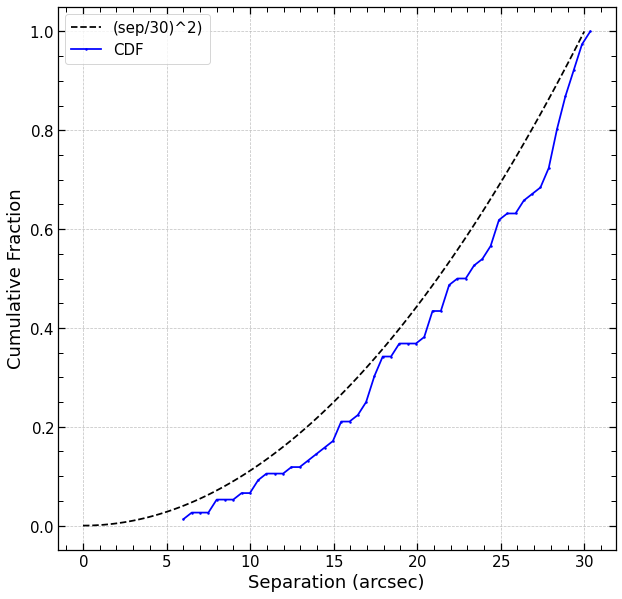

In [19]:

Z = final_ctps.sep_ero_desi
N = len(Z)
# method 1
H,X1 = np.histogram( Z, bins = 50, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
#method 2
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)
xaxis = np.linspace(0, 30, 100)
parabola = (xaxis/30)**2

plt.figure(figsize=(10, 10))
plt.plot(xaxis, parabola, 'k--', label='(sep/30)^2)')
plt.plot(X1[1:], F1,  'b.-', label = 'CDF')
#plt.plot(X2, F2)
plt.xlabel('Separation (arcsec)')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.show()

In [22]:
final_ctps.query('sep_ero_desi/pos_sigma_2d>3.5')

,srcname_fin,RA_fin,DEC_fin,pos_sigma_2d,flux_05-20,DET_LIKE_0,desi_id,desi_ra,desi_dec,x_ray_det,n_x_ray_det,n_desi_ctps,sep_ero_desi
0,SRGe J103143.5+573156,157.914703,57.530025,2.144571,1.160345e-14,61.354324,9011_609939_1093,157.904358,57.533253,csc,1,1,23.125830
1,SRGe J103143.5+573252,157.939733,57.533409,1.214987,2.654584e-14,239.965393,9011_609939_1343,157.930621,57.532696,csc,1,1,17.795812
2,SRGe J103146.1+574035,157.928435,57.686148,3.062868,4.651996e-15,18.008781,9011_610714_2771,157.920372,57.687914,csc,1,1,16.766657
3,SRGe J103146.4+573400,157.927122,57.570267,3.059780,4.907607e-15,14.785759,9011_609939_1460,157.940873,57.567180,csc,1,1,28.779332
4,SRGe J103206.9+574544,158.045172,57.764631,3.431757,4.706896e-15,15.888732,9011_610714_4022,158.053175,57.759501,csc,1,1,24.025896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,SRGe J105617.8+572609,164.090909,57.434272,2.322552,9.006639e-15,48.055706,9011_609952_1938,164.076028,57.435831,csc,1,1,29.374860
76,SRGe J105658.2+572202,164.258631,57.363002,5.485899,4.174206e-15,10.128137,9011_609172_2892,164.244971,57.366162,csc,1,1,28.857262
77,SRGe J105726.2+574738,164.365196,57.778339,2.904874,7.674548e-15,23.834045,9011_610728_1652,164.350515,57.780507,xmm,1,1,29.240181
78,SRGe J105832.1+564932,164.617739,56.830773,3.262009,5.126436e-14,7.540598,9011_607597_409,164.612486,56.836975,csc,1,1,24.606832


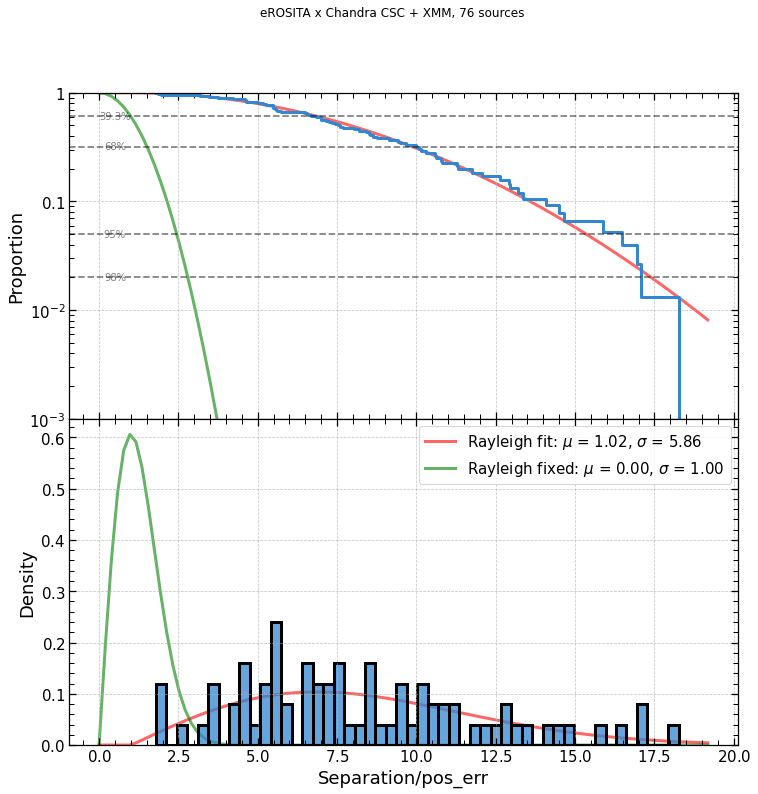

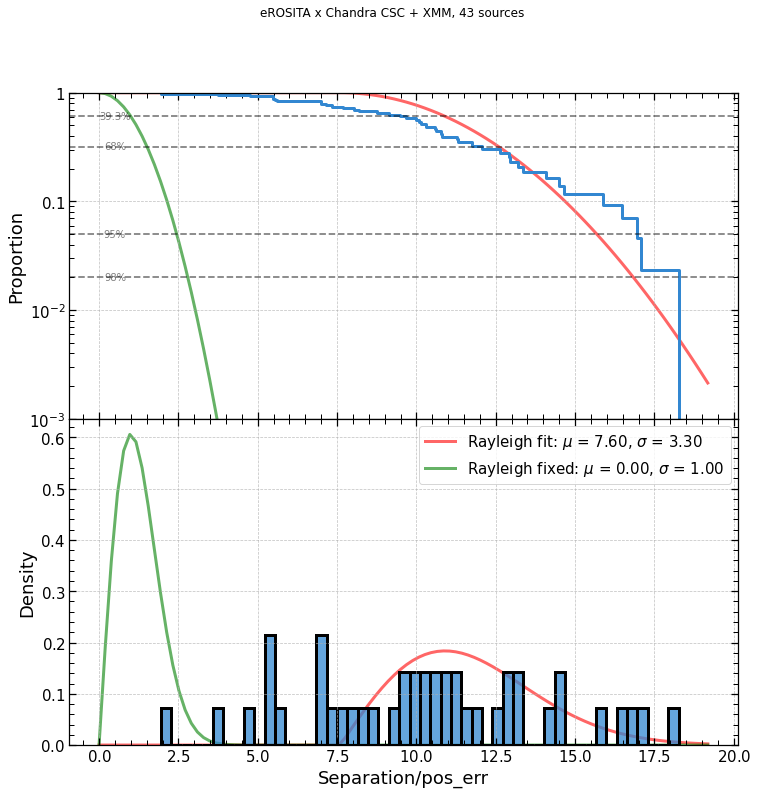

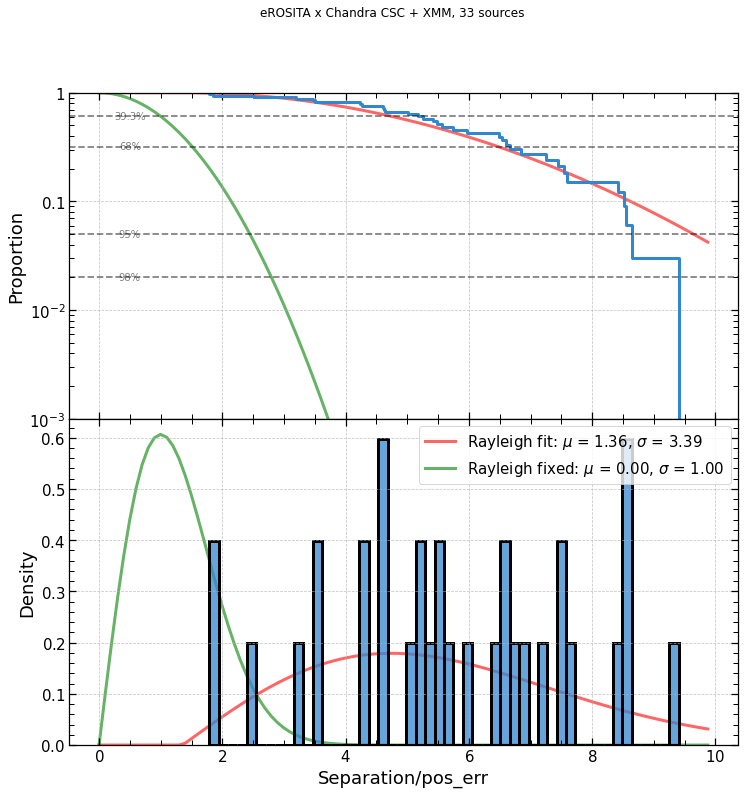

In [23]:
from scripts.cross_match_scripts import rayleigh_plot
rayleigh_plot(final_ctps, sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')
rayleigh_plot(final_ctps.query('DET_LIKE_0>15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')

rayleigh_plot(final_ctps.query('DET_LIKE_0<15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')

